In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Admission_Predict_Ver1.1.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
df.rename(columns={"Serial No.":"SerialNo","Chance of Admit ":"ChanceOfAdmit", "LOR ":"LOR"}, inplace=True)

In [4]:
df.SerialNo.nunique()

500

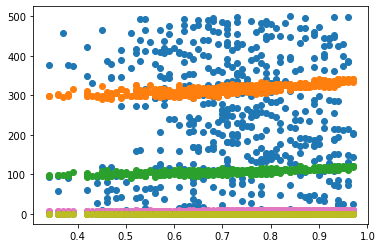

In [5]:
for variable in df:
    plt.scatter(df["ChanceOfAdmit"],df[variable])

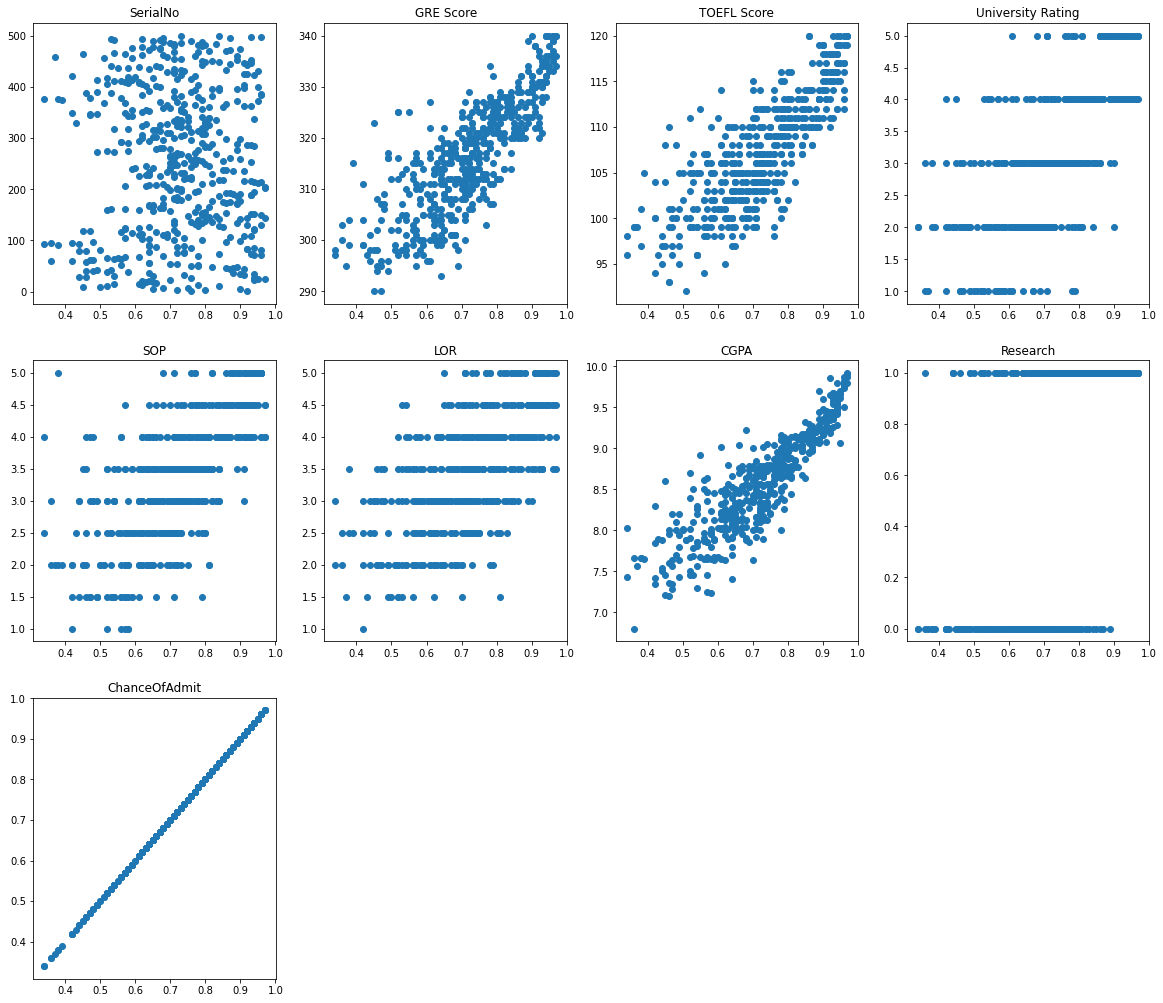

In [6]:
plt.figure(figsize=(20,30))
i=1
for variable in df:
    plt.subplot(5,4,i)
    plt.scatter(df["ChanceOfAdmit"], df[variable])
    plt.title(variable)
    i=i+1

In [7]:
corr_matrix = df.corr()
corr_matrix

,SerialNo,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ChanceOfAdmit
SerialNo,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
ChanceOfAdmit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['CGPA','SOP','LOR']]
Y = df['ChanceOfAdmit']
X_train=X[:400]
Y_train=Y[:400]
X_test=X[400:]
Y_test=Y[400:]

model = LinearRegression(fit_intercept=True, normalize=True).fit(X_train, Y_train)
predictions= model.predict(X_test)

In [9]:
import math
mse=mean_squared_error(predictions, Y_test)
rmse = math.sqrt(mse)
rmse

0.05083021860360504

In [10]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 250, random_state = 20) 
forest.fit(X_train, Y_train)
Y_pred=forest.predict(X_test)

In [11]:
mse=mean_squared_error(Y_pred, Y_test)
rmse = math.sqrt(mse)
rmse

0.06087047711571168